In [2]:
import pandas as pd


In [4]:
df = pd.read_parquet(r'\\xandafs2\Current Clients\ElectraLink\Innovations Team\address match\old_AddressBaseCore_FULL.parquet')

In [6]:
df.shape

(34102749, 27)

In [7]:
df.columns

Index(['UPRN', 'PARENT_UPRN', 'UDPRN', 'USRN', 'TOID', 'CLASSIFICATION_CODE',
       'EASTING', 'NORTHING', 'LATITUDE', 'LONGITUDE', 'RPC',
       'LAST_UPDATE_DATE', 'SINGLE_LINE_ADDRESS', 'PO_BOX', 'ORGANISATION',
       'SUB_BUILDING', 'BUILDING_NAME', 'BUILDING_NUMBER', 'STREET_NAME',
       'LOCALITY', 'TOWN_NAME', 'POST_TOWN', 'ISLAND', 'POSTCODE',
       'DELIVERY_POINT_SUFFIX', 'GSS_CODE', 'CHANGE_CODE'],
      dtype='object')

In [12]:
df_ = df[['UPRN', 'SINGLE_LINE_ADDRESS', 'POSTCODE', 'LATITUDE', 'LONGITUDE']]

In [13]:
df_.shape

(34102749, 5)

In [14]:
df_.head()

UPRN                                SINGLE_LINE_ADDRESS  POSTCODE  \
0    30  BIRCHINGTON, SEVERN ROAD, AVONMOUTH, BRISTOL, ...  BS10 7RZ   
1    33  UNIT 116, BURCOTT ROAD, AVONMOUTH, BRISTOL, BS...  BS11 8AF   
2    38  EVERGREEN SECURE SHREDDING, UNIT 112, BURCOTT ...  BS11 8AF   
3    41  HALLEN FARM, SEVERN ROAD, AVONMOUTH, BRISTOL, ...  BS10 7RZ   
4    63  A P D S LTD, UNIT 301, DEAN ROAD, AVONMOUTH, B...  BS11 8AT   

    LATITUDE  LONGITUDE  
0  51.521317  -2.652862  
1  51.519684  -2.685297  
2  51.520513  -2.686549  
3  51.520362  -2.654837  
4  51.520449  -2.689834

In [16]:
df_.dtypes

UPRN                     int64
SINGLE_LINE_ADDRESS     object
POSTCODE                object
LATITUDE               float64
LONGITUDE              float64
dtype: object

In [17]:
df_.to_parquet('uprn.parquet')

In [20]:
df_.dtypes


UPRN                     int64
SINGLE_LINE_ADDRESS     object
POSTCODE                object
LATITUDE               float64
LONGITUDE              float64
dtype: object

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('match result.csv')

In [9]:
df.head(10)

threshold  mpan_dup  mpan_dis  percent_of_mpan_matched  avg_rouge1_recall  \
0        0.5  31151260  30142370                    88.63           0.933051   
1        0.6  29348345  28749598                    84.53           0.945561   
2        0.7  26465995  26235595                    77.14           0.959479   
3        0.8  21447803  21413814                    62.96           0.976208   
4        0.9   8050797   8049052                    23.67           0.987744   
5        1.0   6625028   6624501                    19.48           0.991768   

   avg_rouge1_precision  avg_rouge1_f1  
0              0.870623       0.895643  
1              0.883466       0.908781  
2              0.898414       0.924040  
3              0.915832       0.942524  
4              0.980268       0.983304  
5              0.995024       0.993128

In [22]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [23]:
from adjustText import adjust_text

In [34]:
plt.plot(df['threshold'], df['mpan_dup'], label='matches of MPAN allowing duplicates')
plt.plot(df['threshold'], df['mpan_dis'], label='matches of distinct MPAN')
txt=[]
for i,j in zip(df['threshold'], df['mpan_dup']):
    txt.append(plt.annotate(str(j),xy=(i,j)))
for i,j in zip(df['threshold'], df['mpan_dis']):
    txt.append(plt.annotate(str(j),xy=(i,j)))
adjust_text(txt)
plt.legend(), plt.grid()
plt.xlabel('Jaccard similarity threshold')
plt.ylabel('number of MPAN matches')
#plt.title()
plt.gca().set_title('number of MPAN matches on different Jaccard similarity threshold', pad=25)

Text(0.5, 1.0, 'number of MPAN matches on different Jaccard similarity threshold')

In [30]:
plt.plot(df['threshold'], df['percent_of_mpan_matched'])
txt=[]
for i,j in zip(df['threshold'], df['percent_of_mpan_matched']):
    txt.append(plt.annotate(str(j),xy=(i,j)))
adjust_text(txt)
plt.legend(), plt.grid()
plt.xlabel('Jaccard similarity threshold')
plt.ylabel('% of MPAN match')
plt.title('percentage of distinct MPAN matches out of all MPAN')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'percentage of distinct MPAN matches out of all MPAN')

Text(0.5, 1.0, 'evaluation result using rouge1 scores as a reflection of match accuracy')

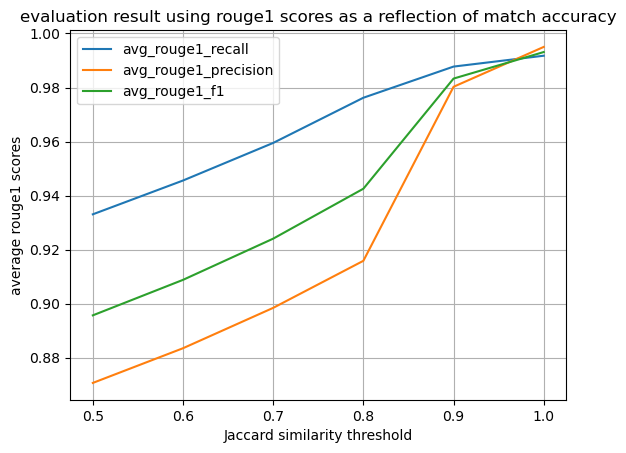

In [37]:
plt.plot(df['threshold'], df['avg_rouge1_recall'], label='avg_rouge1_recall')
plt.plot(df['threshold'], df['avg_rouge1_precision'], label='avg_rouge1_precision')
plt.plot(df['threshold'], df['avg_rouge1_f1'], label='avg_rouge1_f1')
plt.legend(), plt.grid()
plt.xlabel('Jaccard similarity threshold')
plt.ylabel('average rouge1 scores')
plt.title('evaluation result using rouge1 scores as a reflection of match accuracy')